In [1]:
import json 
import os

class score():
 
 def __init__(self, folder_path):
   self.json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
   self.folder_path = folder_path
    
 def score_1(self): 
    record_1=[]  
    for json_file in self.json_files:
      file_path = os.path.join(self.folder_path, json_file)

      with open(file_path, "r", encoding="utf-8") as f:
          data = json.load(f)
      info_1 = data['info']
      event = info_1.get('event', {})
      for teams in data['innings']:
          team = teams["team"]
          for overs in teams['overs']:
              overs_1 = overs['over']
              ball_count = 0
              for deliverie in overs['deliveries']:
                  runs = deliverie.get("runs")
                  wicket = None
                  kind = None
                  if 'wickets' in deliverie:
                      for wicket_info in deliverie['wickets']:
                          wicket = wicket_info.get('player_out')
                          kind = wicket_info.get('kind')
                  current_over = f"{overs_1}.{ball_count}"
                  ball_count +=1  
                  
                  record_1.append({
                      "dates": info_1['dates'][0],
                      "event_name": event.get('name'),
                      "match_number_event": event.get('match_number'),
                      "match_number_type": info_1.get('match_type_number'),
                      "team": team,
                      "overs": current_over,
                      "batter": deliverie.get('batter'),
                      "bowler": deliverie.get('bowler'),
                      "non_striker": deliverie.get('non_striker'),
                      "batter_runs": runs.get('batter'),
                      "extra_runs": runs.get('extras'),
                      "total_runs": runs.get('total'),
                      "wicket": wicket,
                      "kind": kind})

          if "target" in teams:
              target = teams["target"]
              target_runs = target.get("runs")
              target_overs = target.get("overs")

              record_1.append({
                  "team": team,
                  "target_runs": target_runs,
                  "target_overs": target_overs
              }) 
          
          if "powerplays" in teams:
              for powerplay in teams["powerplays"]:
                  record_1.append({
                      "team": team,
                      "powerplay_from": powerplay.get("from"),
                      "powerplay_to": powerplay.get("to"),
                      "powerplay_type": powerplay.get("type")
                  })    

    return record_1 





In [2]:
import pandas as pd
#score cleaning 
#test = C:/Users/Hp/Downloads/tests_json
#t20  = C:/Users/Hp/Downloads/t20s_json
#odi  = C:/Users/Hp/Downloads/Json_files_cric/odis_json

folder_path = "C:/Users/Hp/Downloads/t20s_json"
score_2 = score(folder_path)
score_data = score_2.score_1()

df = pd.DataFrame(score_data)



df['overs'] = df['overs'].fillna("innings finished")
df['batter'] = df['batter'].fillna("0")
df['bowler'] = df['bowler'].fillna("innings finished")
df['non_striker'] = df['non_striker'].fillna("innings finished")
df['batter_runs'] = df['batter_runs'].fillna("innings finished")
df['extra_runs'] = df['extra_runs'].fillna("innings finished")
df['total_runs'] = df['total_runs'].fillna("innings finished")
df['wicket'] = df['wicket'].fillna("not yet")
df['kind'] = df['kind'].fillna("not yet")
if 'powerplay_from' in df.columns:
 df['powerplay_from'] = df['powerplay_from'].fillna("not available")
if 'powerplay_to' in df.columns:
 df['powerplay_to'] = df['powerplay_to'].fillna("not available")
if 'powerplay_type' in df.columns:
 df['powerplay_type'] = df['powerplay_type'].fillna("not available")
if 'target_runs' in df.columns:
 df['target_runs'] = df['target_runs'].fillna("0")
if 'target_overs' in df.columns:
 df['target_overs'] = df['target_overs'].fillna("50")




In [6]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os

In [11]:
plots = r"C:/Users/Hp/OneDrive/Desktop/plots"
os.makedirs(plots, exist_ok=True)

In [34]:
#total wickets in t20
df_wickets = df[df['wicket'] != 'not yet']

# Count wickets per bowler
bowler_wickets = df_wickets.groupby('bowler')['wicket'].count().reset_index()
bowler_wickets = bowler_wickets.sort_values(by='wicket', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='wicket', y='bowler', data=bowler_wickets, palette="viridis")

plt.title("Top 10 Bowlers by Wickets Taken", fontsize=14)
plt.xlabel("Number of Wickets")
plt.ylabel("Bowler")
plt.savefig(os.path.join(plots, "plot01.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_21020\3935890570.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='wicket', y='bowler', data=bowler_wickets, palette="viridis")


In [42]:
#specific analiys for one match battingruns,total runs
random_match = np.random.choice(df['match_number_type'])
match = df[df['match_number_type'] == random_match]
team_1 = match.get('team').drop_duplicates()
team1 = team_1.iloc[0]
team2 = team_1.iloc[1]
team_1_report = match[match['team'] == team1]
team_2_report = match[match['team'] == team2]
team_2_batter_runs = team_2_report.groupby('batter')['batter_runs'].sum().sort_values(ascending = False)
team_1_batter_runs = team_1_report.groupby('batter')['batter_runs'].sum().sort_values(ascending = False)
sns.barplot( team_2_batter_runs,color = 'red')
sns.barplot( team_1_batter_runs,color = 'yellow')
plt.title("Batter runs comparison")
plt.xticks(rotation = 90)
plt.savefig(os.path.join(plots, "plot02.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

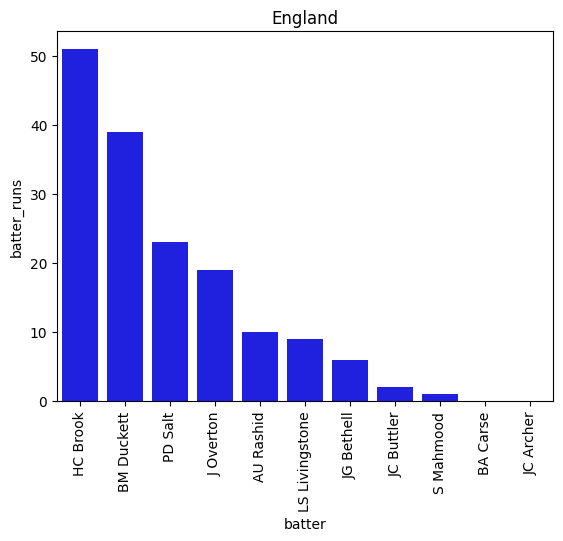

In [12]:
team_1_batter_runs = team_2_report.groupby('batter')['batter_runs'].sum().sort_values(ascending = False)
sns.barplot( team_1_batter_runs, color = 'blue')
plt.xticks(rotation = 90)
plt.title(team2)
plt.show()

In [21]:
#teams score comparison
team_1_score = team_1_report['batter_runs'].sum()
team_2_score = team_2_report['batter_runs'].sum()
teams = [team1, team2]
scores = [team_1_score, team_2_score]
plt.bar(teams, scores, color=['blue', 'red'])
plt.xlabel("Teams")
plt.ylabel("Total Runs")
plt.savefig(os.path.join(plots, "plot03.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

In [9]:
team_1 = match.get('team').drop_duplicates()
team1 = team_1.iloc[0]
team2 = team_1.iloc[1]
team_1

666945      India
667073    England
Name: team, dtype: object

In [10]:

team_1_report = match[match['team'] == team1]
team_2_report = match[match['team'] == team2]

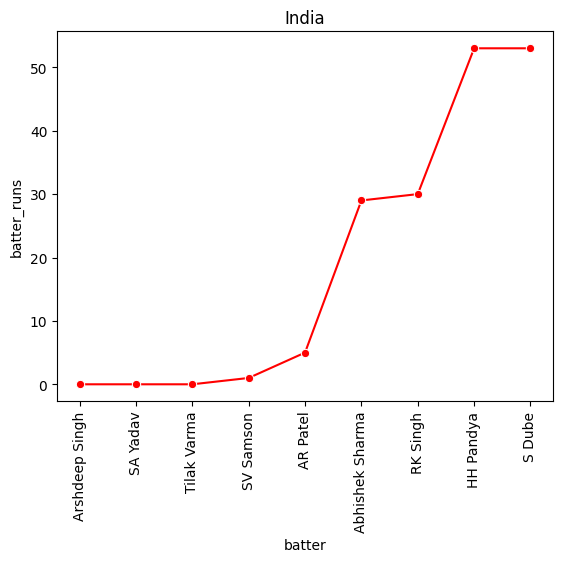

In [15]:
team_2_batter_runs = team_1_report.groupby('batter')['batter_runs'].sum().sort_values(ascending = True)
sns.lineplot( team_2_batter_runs,color = 'red',marker= 'o' )
plt.xticks(rotation = 90)
plt.title(team1)
plt.show()

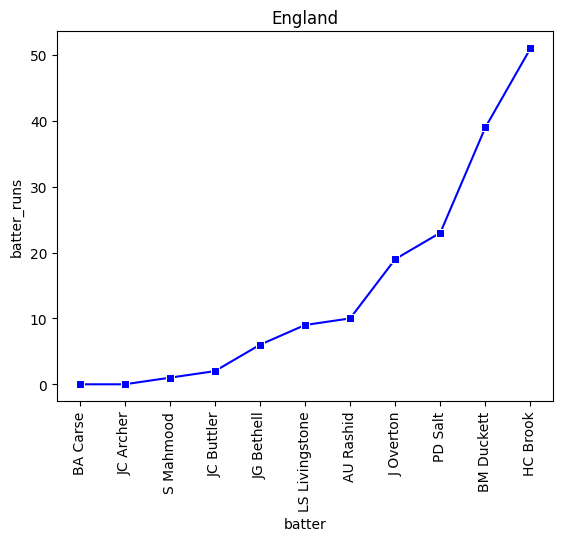

In [16]:
team_1_batter_runs = team_2_report.groupby('batter')['batter_runs'].sum().sort_values(ascending = True)
sns.lineplot( team_1_batter_runs, color = 'blue',marker= 's')
plt.xticks(rotation = 90)
plt.title(team2)
plt.show()

In [17]:
team_1_bowler_wicket = team_1_report.groupby('wicket')['bowler'].count().sort_values(ascending = False).drop("not yet")
team_2_bowler_wicket = team_2_report.groupby('wicket')['bowler'].count().sort_values(ascending = False).drop("not yet")
team_1_bowler_wicket

wicket
AR Patel           1
Abhishek Sharma    1
Arshdeep Singh     1
RK Singh           1
HH Pandya          1
S Dube             1
SA Yadav           1
SV Samson          1
Tilak Varma        1
Name: bowler, dtype: int64

In [18]:
team_2_bowler_wicket

wicket
BM Duckett        1
BA Carse          1
HC Brook          1
J Overton         1
JC Buttler        1
JC Archer         1
JG Bethell        1
LS Livingstone    1
PD Salt           1
S Mahmood         1
Name: bowler, dtype: int64

In [22]:
#total no of out in t20 
wickets = df.groupby('wicket')['wicket'].count().sort_values(ascending = False).drop("not yet").head(10)
sns.barplot(wickets)
plt.xticks(rotation = 45)
plt.savefig(os.path.join(plots, "plot04.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

In [23]:
#most repeated score 
target = df.groupby('target_runs')['target_runs'].count().sort_values(ascending = False).drop("0").head(10)
sns.lineplot(target,marker = "o")
plt.xticks(rotation = 45)
plt.xlabel("Runs")
plt.ylabel("total_no_of_times_repeated")
plt.savefig(os.path.join(plots, "plot05.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

In [24]:
#type of wicket 
kind = df.groupby('kind')['kind'].count().drop("not yet")
sns.lineplot(kind,marker = "o") 
plt.xticks(rotation = 45)
plt.savefig(os.path.join(plots, "plot06.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

In [25]:
#total runs by batsman in t20
df['batter_runs'] = df['batter_runs'].fillna(0)
total_score = df.groupby('batter')['batter_runs'].sum().drop("0").astype(int).sort_values(ascending = False).head(10)
sns.barplot(data = total_score,color = "pink")
plt.xticks(rotation = 45)
plt.savefig(os.path.join(plots, "plot07.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

In [27]:
v_score = df[df['batter'] == "V Kohli"]
#v_score.groupby('batter')['batter_runs']
v_score_1 = v_score[v_score['batter_runs'] == 1].groupby('batter')['batter_runs'].count()
v_score_2 = v_score[v_score['batter_runs'] == 2].groupby('batter')['batter_runs'].count()
v_score_3 = v_score[v_score['batter_runs'] == 3].groupby('batter')['batter_runs'].count()
v_score_4 = v_score[v_score['batter_runs'] == 4].groupby('batter')['batter_runs'].count()
v_score_6 = v_score[v_score['batter_runs'] == 6].groupby('batter')['batter_runs'].count()

In [28]:
v_total_score = {"Runs_Virat" : [v_score_1.iloc[0],v_score_2.iloc[0],v_score_3.iloc[0],v_score_4.iloc[0],v_score_6.iloc[0]],"category" : [1,2,3,4,6]}
pd.DataFrame(v_total_score)

,Runs_Virat,category
0,1348,1
1,257,2
2,7,3
3,349,4
4,115,6


In [29]:
runs = []
for run in v_total_score["Runs_Virat"]:
   runs.append(run)
category =[]
for categorys in v_total_score["category"]:
   category.append(categorys)

In [41]:
plt.pie(runs,labels = category,shadow= True, autopct = '%1.1f%%' )
plt.title("Virat_kholi_runs_analysis")
plt.savefig(os.path.join(plots, "plot08.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

In [39]:
df_sixes = df[df['batter_runs'] == 6]

# Count sixes per batter
batter_sixes = df_sixes.groupby('batter')['batter_runs'].count().reset_index()
batter_sixes.rename(columns={'batter_runs': 'sixes'}, inplace=True)

# Get top 10 batters
top_sixes = batter_sixes.sort_values(by='sixes', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='sixes', y='batter', data=top_sixes, palette="coolwarm")

plt.title("Top 10 Batters with Most Sixes", fontsize=14)
plt.xlabel("Number of Sixes")
plt.ylabel("Batter")
plt.tight_layout()
plt.savefig(os.path.join(plots, "plot09.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_21020\3608376825.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sixes', y='batter', data=top_sixes, palette="coolwarm")


In [40]:
df_fours = df[df['batter_runs'] == 4]

# Count fours per batter
batter_fours = df_fours.groupby('batter')['batter_runs'].count().reset_index()
batter_fours.rename(columns={'batter_runs': 'fours'}, inplace=True)

# Get top 10 batters
top_fours = batter_fours.sort_values(by='fours', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='fours', y='batter', data=top_fours, palette="mako")

plt.title("Top 10 Batters with Most Fours", fontsize=14)
plt.xlabel("Number of Fours")
plt.ylabel("Batter")
plt.tight_layout()
plt.savefig(os.path.join(plots, "plot010.png"), dpi=300, bbox_inches="tight")
plt.close()
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_21020\709277127.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fours', y='batter', data=top_fours, palette="mako")


In [31]:
df

,dates,event_name,match_number_event,match_number_type,team,overs,batter,bowler,non_striker,batter_runs,extra_runs,total_runs,wicket,kind,powerplay_from,powerplay_to,powerplay_type,target_runs,target_overs
0,2017-02-17,Sri Lanka in Australia T20I Series,1.0,596.0,Australia,0.0,AJ Finch,SL Malinga,M Klinger,0.0,0.0,0.0,not yet,not yet,not available,not available,not available,0,50
1,2017-02-17,Sri Lanka in Australia T20I Series,1.0,596.0,Australia,0.1,AJ Finch,SL Malinga,M Klinger,0.0,0.0,0.0,not yet,not yet,not available,not available,not available,0,50
2,2017-02-17,Sri Lanka in Australia T20I Series,1.0,596.0,Australia,0.2,AJ Finch,SL Malinga,M Klinger,1.0,0.0,1.0,not yet,not yet,not available,not available,not available,0,50
3,2017-02-17,Sri Lanka in Australia T20I Series,1.0,596.0,Australia,0.3,M Klinger,SL Malinga,AJ Finch,2.0,0.0,2.0,not yet,not yet,not available,not available,not available,0,50
4,2017-02-17,Sri Lanka in Australia T20I Series,1.0,596.0,Australia,0.4,M Klinger,SL Malinga,AJ Finch,0.0,0.0,0.0,not yet,not yet,not available,not available,not available,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915871,2016-09-09,Australia in Sri Lanka T20I Series,2.0,567.0,Australia,17.2,TM Head,SS Pathirana,PM Nevill,0.0,0.0,0.0,not yet,not yet,not available,not available,not available,0,50
915872,2016-09-09,Australia in Sri Lanka T20I Series,2.0,567.0,Australia,17.3,TM Head,SS Pathirana,PM Nevill,0.0,0.0,0.0,not yet,not yet,not available,not available,not available,0,50
915873,2016-09-09,Australia in Sri Lanka T20I Series,2.0,567.0,Australia,17.4,TM Head,SS Pathirana,PM Nevill,6.0,0.0,6.0,not yet,not yet,not available,not available,not available,0,50
915874,NaN,NaN,NaN,NaN,Australia,innings finished,0,innings finished,innings finished,innings finished,innings finished,innings finished,not yet,not yet,not available,not available,not available,129.0,20.0
